---
title: Deep Learning with Pytorch (Example implementations)
excerpt: This post implements the examples and exercises in the book "Deep Learning with Pytorch" by Eli Stevens, Luca Antiga, and Thomas Viehmann.
series: ml
date: 2020-08-20 23:50:52
type: post
---

This post implements the examples and exercises in the book "Deep Learning with Pytorch" by Eli Stevens, Luca Antiga, and Thomas Viehmann.

${toc}

## Chapter I: Setting up pytorch environment

In [3]:
import torch
torch.cuda.is_available()

False

## Chapter II: Using pretrained models

### Image classifications with AlexNet and ResNet101

In [4]:
import torchvision as vis

In [7]:
vis_models = vis.models
dir(vis_models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [10]:
# AlexNet, untrained
alex_net = vis_models.AlexNet()
# AlexNet, pretrained
alex_net = vis_models.alexnet(pretrained=True)
# ResNet101, pretrained
res_net_101 = vis_models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\tqshe/.cache\torch\hub\checkpoints\resnet101-5d3b4d8f.pth
100.0%


In [11]:
# Check network structure
alex_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [12]:
# Define preprocess transforms for input images
preprocess = vis.transforms.Compose([
    vis.transforms.Resize(256),
    vis.transforms.CenterCrop(224),
    vis.transforms.ToTensor(),
    vis.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

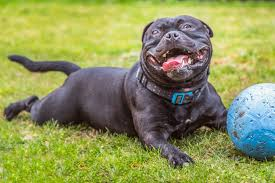

In [43]:
# Preprocess a test image
import PIL as pil
img_path = os.path.expanduser('~/Pictures/dog.jpg')
img = pil.Image.open(img_path)

img_t = preprocess(img)
img

In [41]:
# Transform it into input batches
batch_t = torch.unsqueeze(img_t, 0)

In [30]:
# Load ImageNet classes
with open('imagenet_classes.txt', mode='r') as f:
    labels = [line.split(',')[1].strip() for line in f.readlines()]

In [39]:
# Run pretrained AlexNet on the test image and produce top 5 predictions
alex_net.eval()
out = alex_net(batch_t)
out_perc = torch.nn.functional.softmax(out, dim=1)[0] * 100

sorted_scores, sorted_indices = torch.sort(out, descending=True)

[(labels[i], out_perc[i].item()) for i in sorted_indices[0][:5]]

[('Mexican_hairless', 51.601417541503906),
 ('Staffordshire_bullterrier', 24.20741081237793),
 ('German_short-haired_pointer', 3.9085214138031006),
 ('Labrador_retriever', 3.767038106918335),
 ('American_Staffordshire_terrier', 3.0548388957977295)]

In [40]:
# Run pretrained ResNet101 on the test image and produce top 5 predictions
res_net_101.eval()
out = res_net_101(batch_t)
out_perc = torch.nn.functional.softmax(out, dim=1)[0] * 100

sorted_scores, sorted_indices = torch.sort(out, descending=True)

[(labels[i], out_perc[i].item()) for i in sorted_indices[0][:5]]

[('Staffordshire_bullterrier', 54.67277908325195),
 ('pug', 17.931257247924805),
 ('French_bulldog', 16.752498626708984),
 ('bull_mastiff', 3.8396053314208984),
 ('Brabancon_griffon', 3.1416945457458496)]